In [13]:
import numpy as np
import xlrd
import time
from math import atan
from math import cos
from math import sqrt
from math import sin
from math import acos
import matplotlib.pyplot as plt
from IPython.display import Image as img

In [14]:
#DEFININDO UMAS CONSTANTES
pi = np.pi
RT = 6731 #KM

In [15]:
#DEFININDO A FUNCAO PARA LER O ARQUIVO EXCEL(XLS) 
def xlsread(arq_xls,pg):   #Funcao para ler arquivo excel
    # Abre o arquivo
    xls = xlrd.open_workbook(arq_xls)
    # Pega a planilha pg do arquivo
    plan = xls.sheets()[pg]
    # Para i de zero ao numero de linhas da planilha
    for i in range(plan.nrows):
        # Le os valores nas linhas da planilha
        yield plan.row_values(i) 

In [16]:
#DEFININDO A FUNCAO QUE CALCULA DISTANCIAS SAMA-IRAI
def caldist(latA,longA,latB,longB):
    ax = longA*pi/180
    ay = latA*pi/180
    bx = longB*pi/180
    by = latB*pi/180
    d = RT *acos(sin(ay)*sin(by) + cos(ay)*cos(by)*cos(ax-bx))
    return d

In [17]:
#DEFININDO A FUNCAO QUE CALCULA O ANGULOS SAMA - IRAI
def calang(latA,longA,latB,longB):
    x = abs(longB-longA)
    y = abs(latB-latA)
    ang = (180/pi)*atan(y/x)
    return ang

In [18]:
#DEFININDO AS COORDENADAS DA ESTACAO IRAI
irai = []
irailat = -27.18
irailong = -53.23
irai.append(irailat)
irai.append(irailong)
#print(f'As coordenadas da estação de Iraí, são {irai}°')

In [19]:
#DADOS DE PRECIPITACAO DA ESTACAO IRAI
iraiyr = []
iraianual = []
for coluna in xlsread('Irai (RS).xls',2):
    iraiyr.append(coluna[0])
    iraianual.append(coluna[19])
iraiyr = iraiyr[5:len(iraiyr)-2]
iraianual = iraianual[5:len(iraianual)-2]

In [20]:
#DEFININDO O VETOR DE COORDENADAS DA SAMA
samalat = []
samalong = []
samayr = []
for linha in xlsread('Sama.XLS',0):
    samayr.append(linha[0])
    samalong.append(linha[1])
    samalat.append(linha[2])

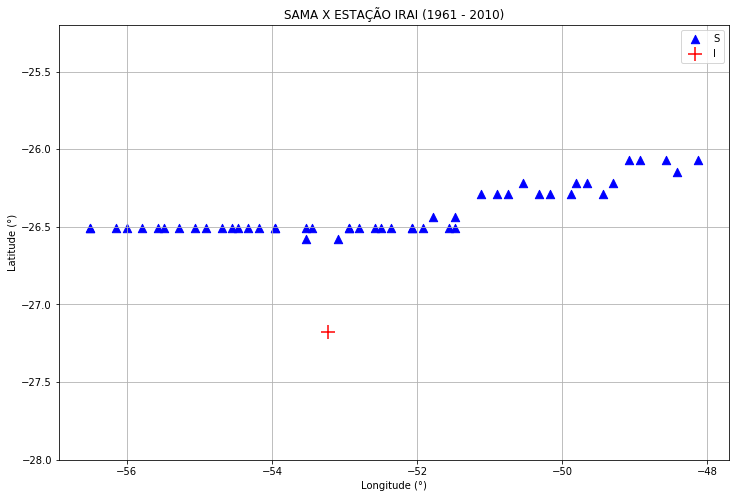

In [21]:
#PLOTANDO A ESTACAO IRAI E A SAMA (1961 - 2010)
plt.figure(figsize=(12,8))
plt.scatter(samalong, samalat, s = 70, marker='^',color='blue')
plt.scatter(irailong, irailat, s = 200, marker='+', color='red')
plt.legend('SI')
plt.grid()
plt.ylim(-28,-25.2)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('SAMA X ESTAÇÃO IRAI (1961 - 2010)')
plt.show()

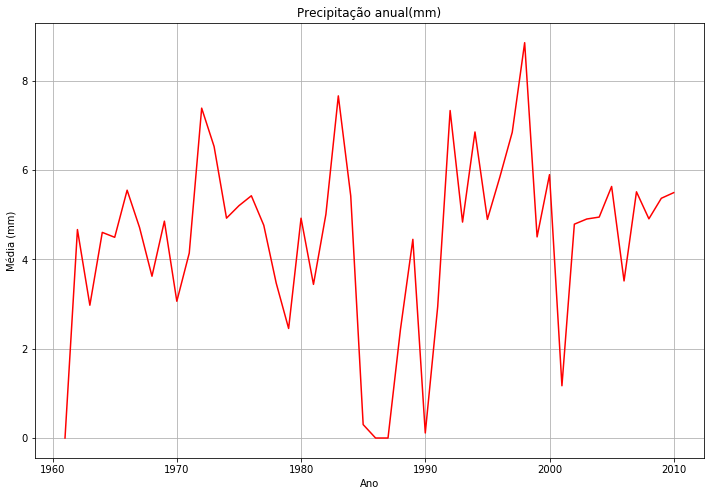

In [31]:
#PLOTANDO A PRECIPITACAO NA ESTACAO IRAI - (1961 - 2010
'''print(f'ANO           MEDIA ANUAL')
for i in range(0,len(iraianual)):
    print(f'\n{iraiyr[i]}        {iraianual[i]}')'''
plt.figure(figsize=(12,8))
plt.plot(iraiyr,iraianual,color = 'red')
plt.title('Precipitação anual(mm)')
plt.xlabel('Ano')
plt.ylabel('Média (mm)')
plt.grid()
plt.show()

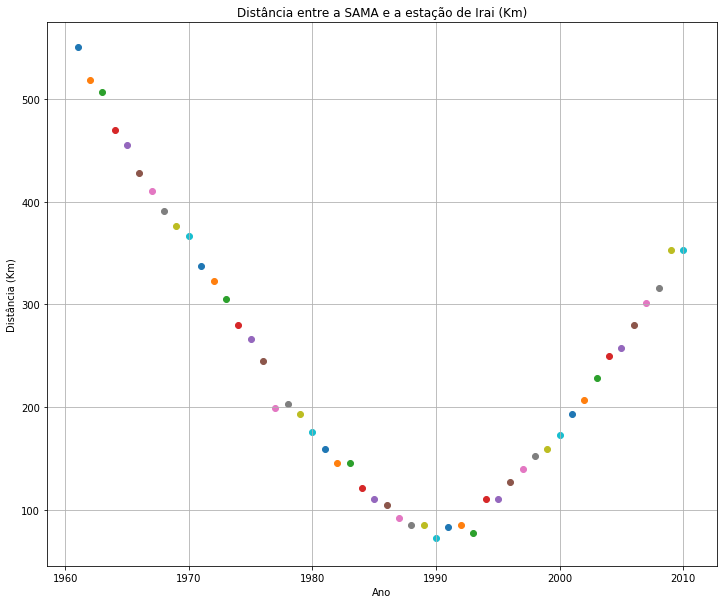

In [32]:
#CALCULANDO AS DISTANCIAS ENTRE IRAI E A SAMA - d(A,B) = RT *acos(sin(latA)*sin(latB) + cos(latA)*cos(latB)*cos(LonA-lonB))
plt.figure(figsize=(12,10))
for i in range(0,len(samalat)):    
    #print(f'\n A distância distância da SAMA, na coordenada ({samalat[i]}°,{samalong[i]}°) para a estação de Irai é de {caldist(irailat,irailong,samalat[i],samalong[i])} Km.')
    plt.scatter(samayr[i],caldist(irailat,irailong,samalat[i],samalong[i]),marker = 'o')
plt.xlabel('Ano')
plt.ylabel('Distância (Km)')
plt.title('Distância entre a SAMA e a estação de Irai (Km)')
plt.grid()
plt.show()

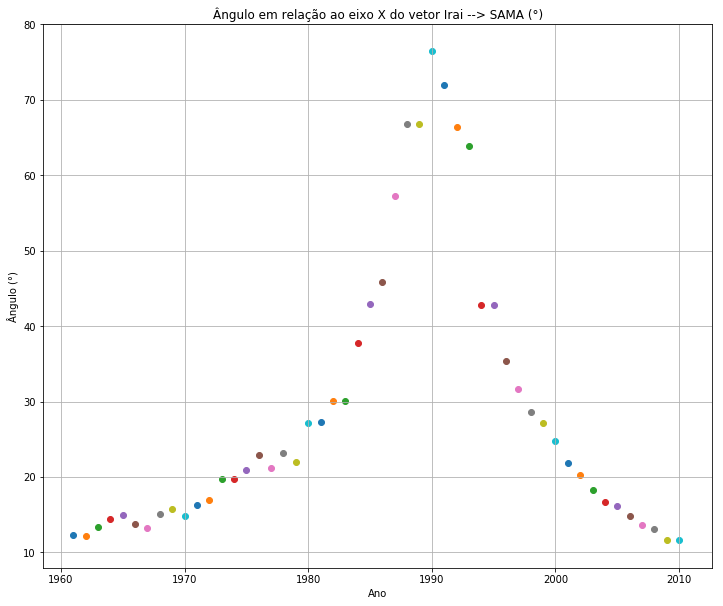

In [33]:
#CALCULANDO A DIRECAO DO VETOR IRAI-SAMA
plt.figure(figsize=(12,10))
for i in range(0,len(samalat)):
    #print(f'\n O ângulo entra a SAMA, na coordenada ({samalat[i]}°,{samalong[i]}°) e a estação de Irai é de {calang(irailat,irailong,samalat[i],samalong[i])}°.')
    plt.scatter(samayr[i],calang(irailat,irailong,samalat[i],samalong[i]),marker='o')
plt.grid()
plt.ylabel('Ângulo (°)')
plt.xlabel('Ano')
plt.title('Ângulo em relação ao eixo X do vetor Irai --> SAMA (°)')
plt.show()

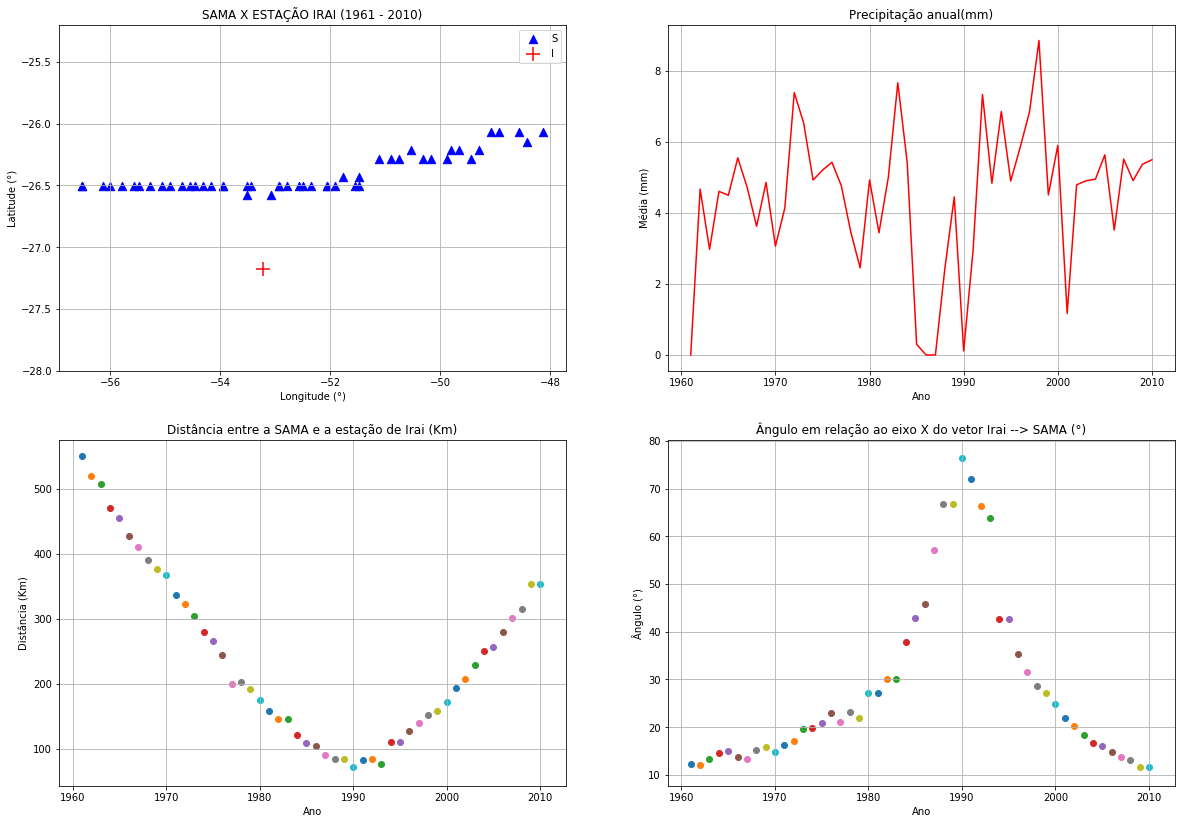

In [30]:
# FIGURA (PDF) CONTENDO AS IMAGENS DOS 4 DADOS (POSICAO,PRECIPITACAO,DISTANCIA,ANGULO)
plt.figure(figsize=(20,14))
plt.subplot(2,2,1)
plt.scatter(samalong, samalat, s = 70, marker='^',color='blue')
plt.scatter(irailong, irailat, s = 200, marker='+', color='red')
plt.legend('SI')
plt.grid()
plt.ylim(-28,-25.2)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('SAMA X ESTAÇÃO IRAI (1961 - 2010)')
plt.subplot(2,2,2)
plt.plot(iraiyr,iraianual,color = 'red')
plt.title('Precipitação anual(mm)')
plt.xlabel('Ano')
plt.ylabel('Média (mm)')
plt.grid()
plt.subplot(2,2,3)
for i in range(0,len(samalat)):    
    plt.scatter(samayr[i],caldist(irailat,irailong,samalat[i],samalong[i]),marker = 'o')
plt.ylabel('Distância (Km)')
plt.xlabel('Ano')
plt.title('Distância entre a SAMA e a estação de Irai (Km)')
plt.grid()
plt.subplot(2,2,4)
for i in range(0,len(samalat)):
    plt.scatter(samayr[i],calang(irailat,irailong,samalat[i],samalong[i]),marker='o')
plt.grid()
plt.ylabel('Ângulo (°)')
plt.xlabel('Ano')
plt.title('Ângulo em relação ao eixo X do vetor Irai --> SAMA (°)')
plt.savefig('SAMA - IRAI.pdf',dpi=500, transparent=True, bbox_inches='tight')
plt.show()